### 衡量回归算法的标准

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

#### 波士顿房产数据

In [3]:
boston=datasets.load_boston()

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
x=boston.data[:,5] #只使用房间数量这个特征

In [8]:
x.shape

(506,)

In [9]:
y=boston.target

In [10]:
y.shape

(506,)

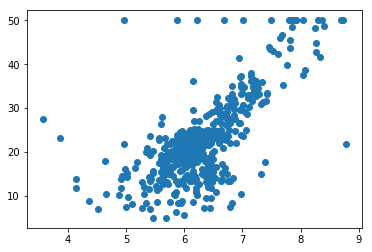

In [11]:
plt.scatter(x,y)

In [12]:
np.max(y)

50.0

In [13]:
x=x[y<50.0]
y=y[y<50.0]

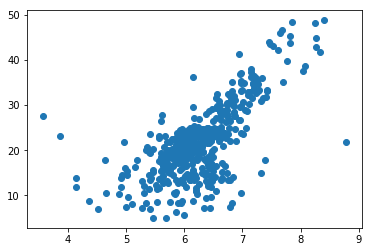

In [14]:
plt.scatter(x,y)

#### 使用简单线性回归法

In [20]:
from ML.model_selection import train_test_split

x_train,y_train,x_test,y_test=train_test_split(x,y,seed=123)

In [21]:
x_train.shape

(392,)

In [22]:
x_test.shape

(98,)

In [23]:
y_train.shape

(392,)

In [24]:
y_test.shape

(98,)

In [25]:
from ML.SimpleLinearRegression import SimpleLinearRegression2

In [26]:
reg=SimpleLinearRegression2()
reg.fit(x_train,y_train)

In [27]:
reg.a_

8.24589774299138

In [28]:
reg.b_

-30.03424173044045

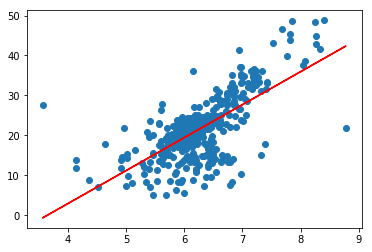

In [30]:
plt.scatter(x_train,y_train)
plt.plot(x_train,reg.predict(x_train),color="r")

In [31]:
y_predict=reg.predict(x_test)

#### MSE

In [32]:
mse_test=np.sum((y_predict-y_test)**2)/len(y_test)
mse_test

31.83636270294449

#### RMSE

In [33]:
from math import sqrt

rmse_test=sqrt(mse_test)
rmse_test

5.642372081221203

#### MAE

In [34]:
mae_test=np.sum(np.absolute(y_predict-y_test))/len(y_test)
mae_test

4.167600966616064

#### sklearn中的MSE和MAE

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [36]:
mean_squared_error(y_test,y_predict)

31.83636270294449

In [37]:
mean_absolute_error(y_test,y_predict)

4.167600966616064

#### R Square

In [38]:
1-mean_squared_error(y_test,y_predict)/np.var(y_test)

0.4844390669123677

In [39]:
from sklearn.metrics import r2_score

r2_score(y_test,y_predict)

0.4844390669123678